In [6]:
%load_ext autoreload
%matplotlib widget
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import imageio
import tensorflow as tf
from tqdm.autonotebook import trange
from keras.datasets import mnist

%autoreload 1
%aimport jsi

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Num GPUs Available:  1


In [ ]:
# preset patterns
mask = {
    's': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 0, 0, 1, 0], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [0, 1, 0, 0, 1, 1, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    't': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [1, 0, 0, 0, 0, 0, 0], 
        [1, 0, 0, 0, 0, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'e': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 0, 0, 1], 
        [1, 0, 0, 0, 0, 0, 1], 
        [1, 0, 0, 0, 0, 0, 1], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'v': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 0, 0], 
        [0, 0, 0, 0, 0, 1, 0], 
        [0, 0, 0, 0, 0, 0, 1], 
        [0, 0, 0, 0, 0, 1, 0], 
        [1, 1, 1, 1, 1, 0, 0], 
        [0, 0, 0, 0, 0, 0, 0]]
    ), 
    'n': np.array(
        [[0, 0, 0, 0, 0, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [0, 0, 1, 0, 0, 0, 0], 
        [0, 0, 0, 1, 0, 0, 0], 
        [0, 0, 0, 0, 1, 0, 0], 
        [1, 1, 1, 1, 1, 1, 1], 
        [0, 0, 0, 0, 0, 0, 0]]
    )
}

duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255

tf.Tensor(0.15994072, shape=(), dtype=float32)
TARGET: 
--------------------
APPROXIMATION: 


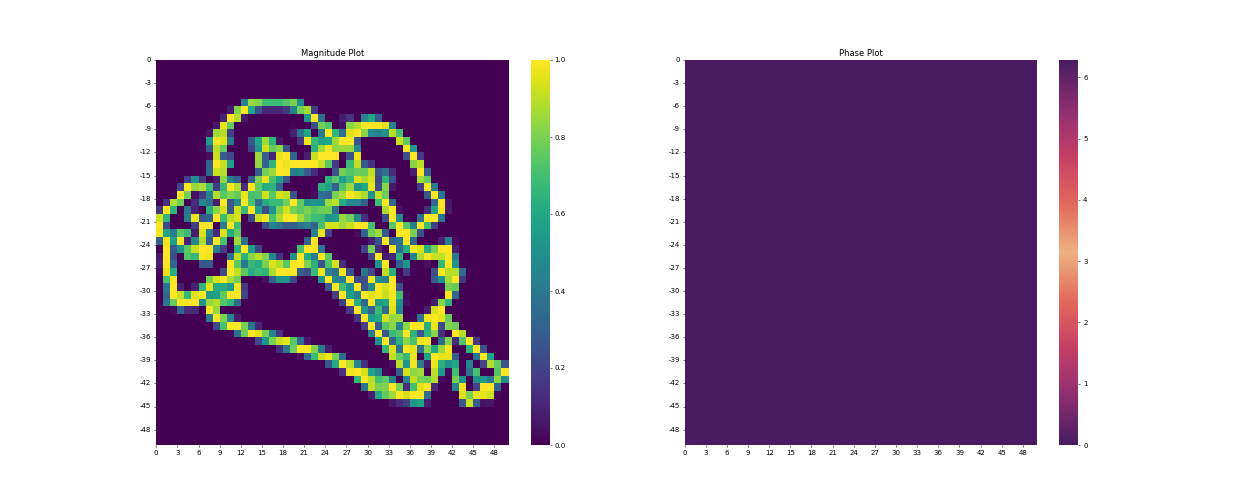

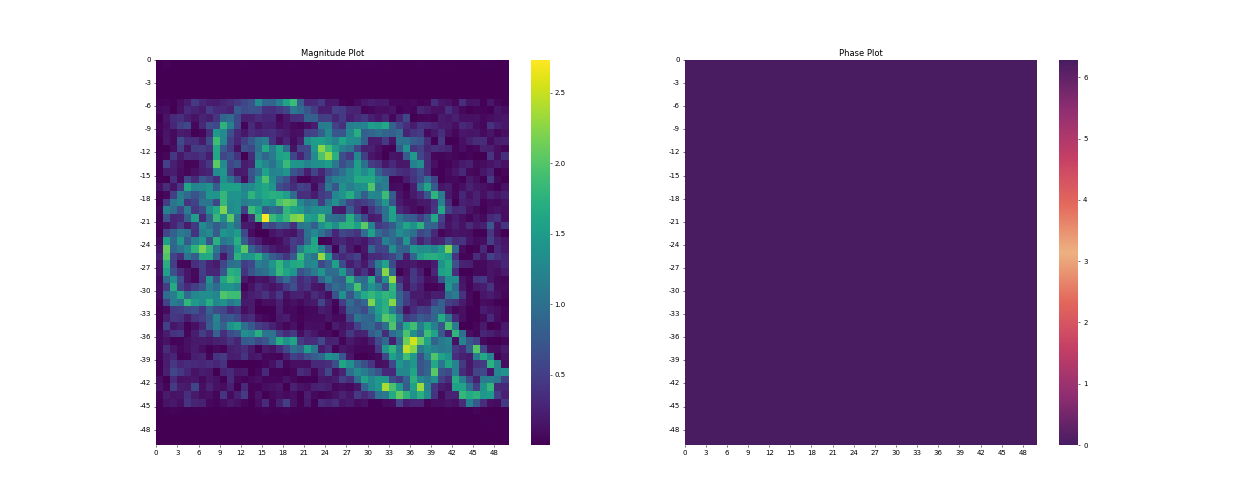

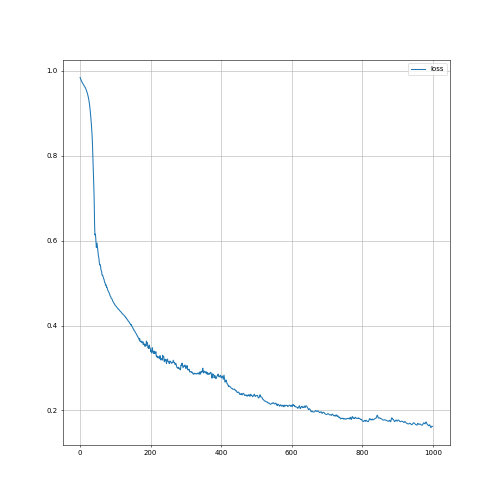

In [34]:
# JSI Approximation

np.set_printoptions(formatter={'complexfloat': lambda x: "{0.real:0.3f} + {0.imag:0.3f}i".format(x)})

duck = np.asarray(imageio.imread('./duck_pix.png'))[:, :, 3] / 255
nodes = 50
# padding = 50 #0.06560147
# padding = 5 # 0.14005375
padding = 0 # 0.21368206
# target = np.random.uniform(0, 1, (nodes, nodes)) #* np.exp(2j * np.pi * np.random.uniform(0, 1, (nodes, nodes))))
# target = np.abs(np.random.normal(0, 1, (nodes, nodes)))
# target = jsi.jsi(nodes, js, phis, js_nh, phis_nh, g, y_0, y_ex, 0, 0, 0, 0)
# target = np.transpose(mask['s'])
target = duck
input = {
        'nodes' : nodes,
        'padding' : padding,
        'n_rings': 5,
        'target' : target,
        'orth_itr' : 10
        }
pred, loss, output = jsi.jsi_backprop(input, EPOCHS=1e3)#3e-5)
# print(pred)
print(pred['loss'])
# print(output)
try:
    plt.close(fig1)
    plt.close(fig2)
    plt.close(fig3)
except:
    pass

print("TARGET: ")
print("--------------------")
fig1 = jsi.pltSect(target, 0, 0, nodes, nodes)
print("APPROXIMATION: ")
fig2 = jsi.pltSect(output, 0, 0, nodes, nodes)
# fig2 = jsi.data2HM(pred)

fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
ax.plot(range(len(loss)), loss, label='loss')
ax.legend(loc='best')
ax.grid()

In [ ]:
# JSI Approximation using MNIST dataset
np.set_printoptions(formatter={'complexfloat': lambda x: "{0.real:0.3f} + {0.imag:0.3f}i".format(x)})

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train shape:', train_X.shape)
print('Y_train shape:', train_y.shape)
print('X_test shape:', test_X.shape)
print('Y_test shape:', test_y.shape)

loss_all = np.zeros((3, 10, 10))

for i in trange(10):
    for j in trange(10):
        for k in trange(3):
            nodes = 28
            target = train_X[i]
            input = {
                    'nodes' : nodes,
                    'padding' : j + 1 if k == 0 else 0,
                    'n_rings': j + 1 if k == 1 else 1,
                    'length': j + 1 if k == 2 else 1,
                    'target' : target,
                    'orth_itr' : 3
                    }
            pred, loss, output = jsi.jsi_backprop(input, EPOCHS=5e2, lr=1e-2)#3e-5)
            # print(pred)
            print(loss[-1])
            loss_all[k][j][i] = min(loss)
            # try:
            #     plt.close(fig)
            #     plt.close(fig3)
            # except:
            #     pass
            
            # fig = jsi.pltCtst(target, output, 0, 0, nodes, nodes)
            # plt.savefig("./test/mnist_" + str(i) + "_pad_" + str(pred['padding']) + "_nr_" + str(pred['n_rings']) + "_l_" + str(pred['length']) + "-" + str(loss[-1]) + ".png")
            # # fig3, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=50)
            # # ax.plot(range(len(loss)), loss, label='loss')
            # # ax.legend(loc='best')
            # # ax.grid()
            # if pred.get('int', False):
            #     raise KeyboardInterrupt()